# **Workshop on Satellite Remote Sensing**
# EDF 4932 Exploring Research (FAU High School, Grade 9)
---------
## **Instructor: Tucker Hindle**
### Last Updated: May 19, 2023


### URL for sharing: https://colab.research.google.com/drive/1Rrpfnk7lJ2RSBcgK5ZcgwJtGbRYqxyMN?usp=sharing


---------


Materials utilize the geemap Python package for interactive mapping and geospatial analysis with Google Earth Engine (GEE), developed by Dr. Qiusheng Wu (https://wetlands.io). Check out the geemap tutorials (https://geemap.org/tutorials) and Dr. Wu's YouTube Channel (https://www.youtube.com/@giswqs) to learn more!

Citation: Wu, Q., (2020). geemap: A Python package for interactive mapping with Google Earth Engine. The Journal of Open Source Software, 5(51), 2305. https://doi.org/10.21105/joss.02305

Adapted from https://share.gishub.org/pakistan_floods

---------

## Fundamentals of Earth Observation Satellites

Remote sensing allows you to obtain information about an object without any physical contact.

In electro-optical & passive remote sensing, sensors on satellites/aircraft/drones store energy measurements (radiance) captured at a location.  The imagery allows you to calculate the reflectance of an object to identify things such as: water, vegetation, concrete, and other objects that reflect light differently.

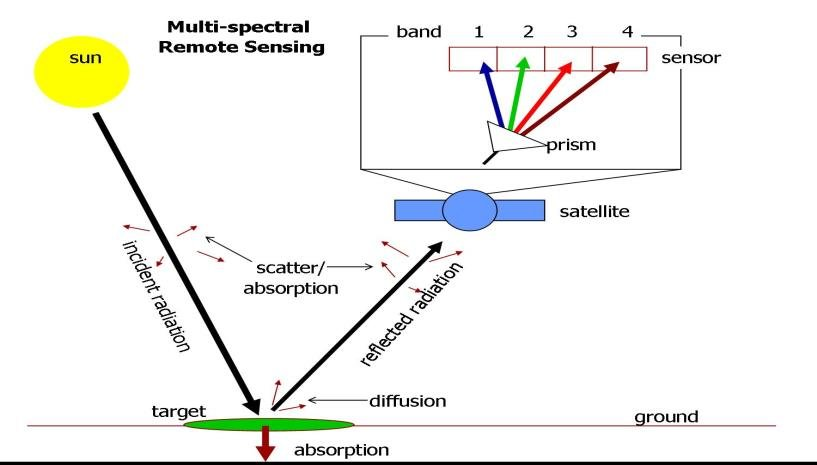

Image Credit: Prakash, Satya & Singh, Satyam & Kumar, Mukul & Dwivedi, Naveen & Dwivedi, Shubha & Sharma, Parshant & Jain, Dr.Prashant & Verma, Preetam & Mishra, Ved. (2016). Sustainable development in the field of agriculture using the remote sensing and GIS technology. ASIAN JOURNAL OF BIO SCIENCE. 11. 212-216. 10.15740/HAS/AJBS/11.1/212-216.

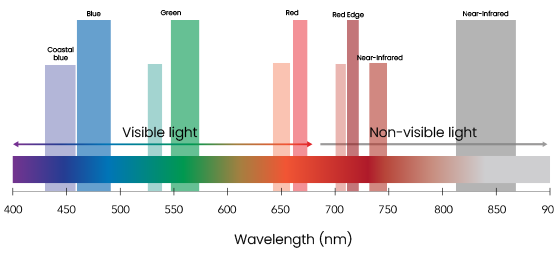

Image Credit: AgEagle Micasense RedEdge-P dual bands


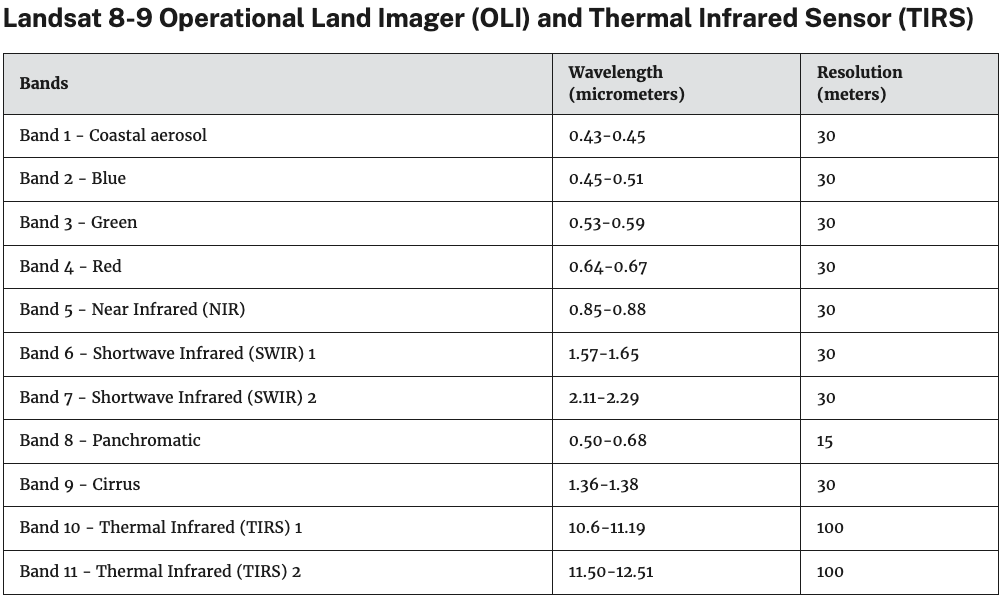

Source: USGS (https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

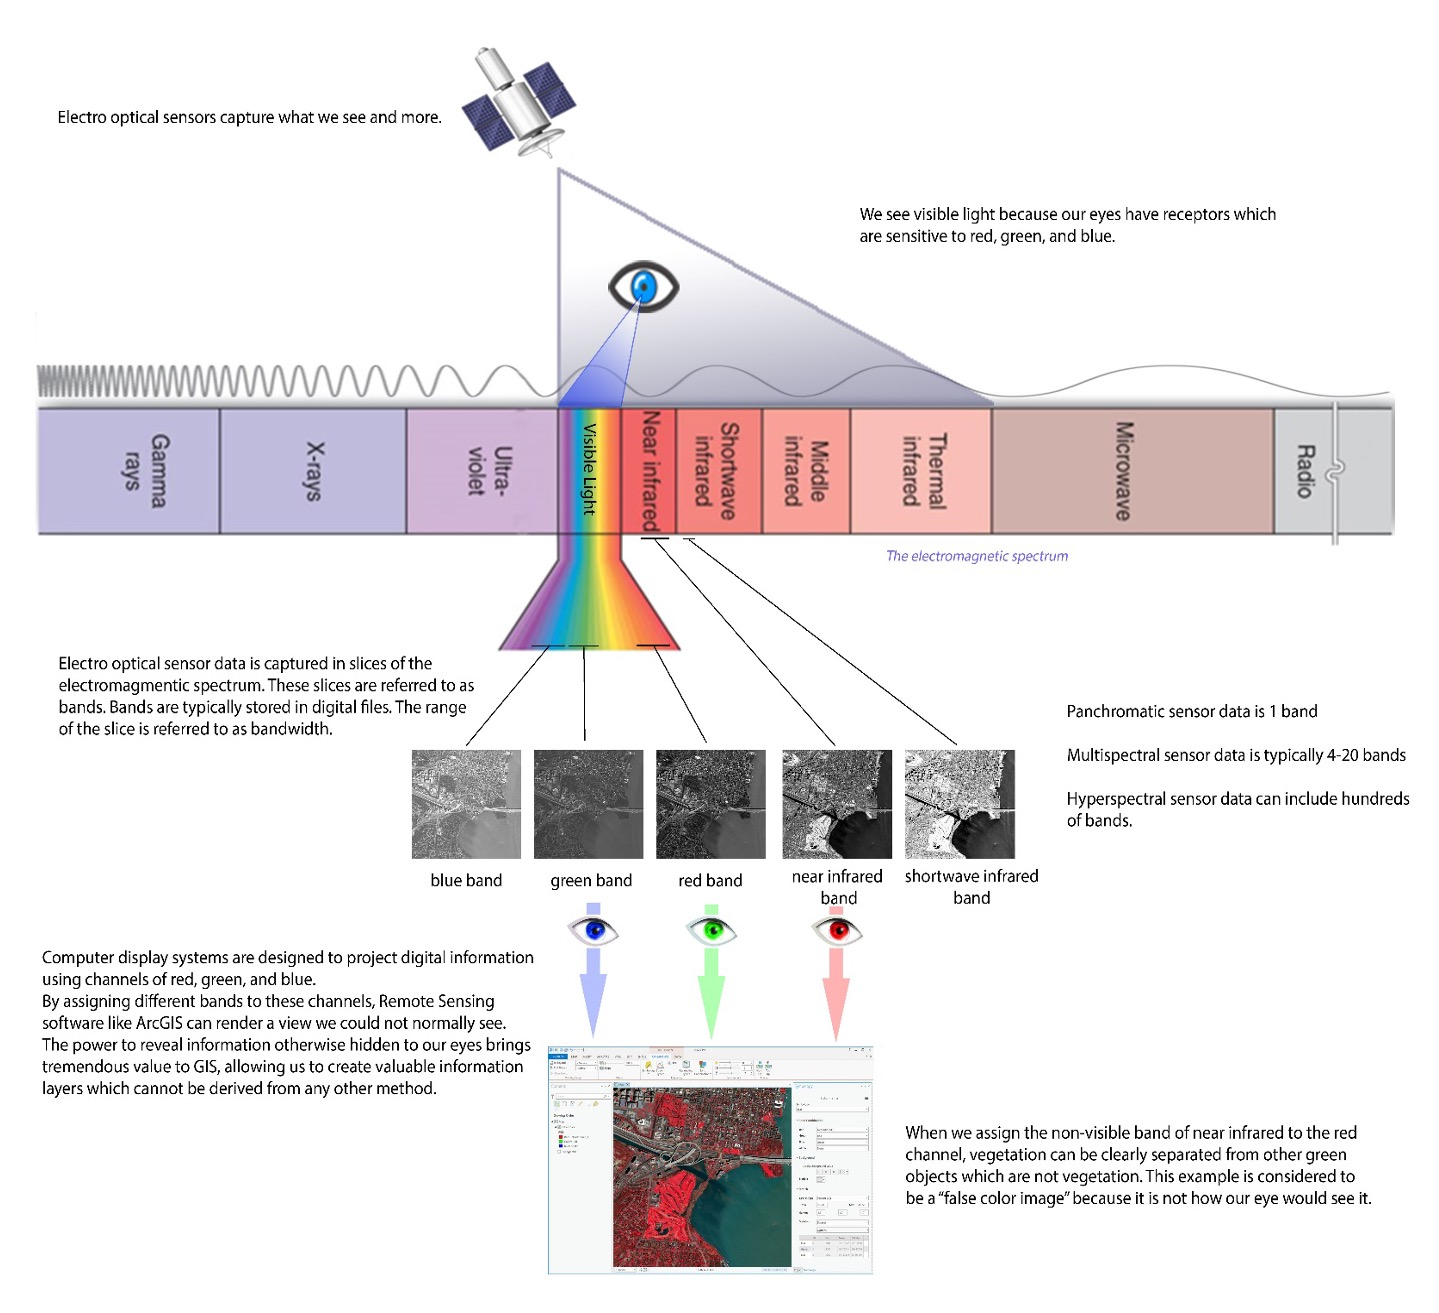

Image Credit: Copyright © 2020 Esri. All rights reserved.

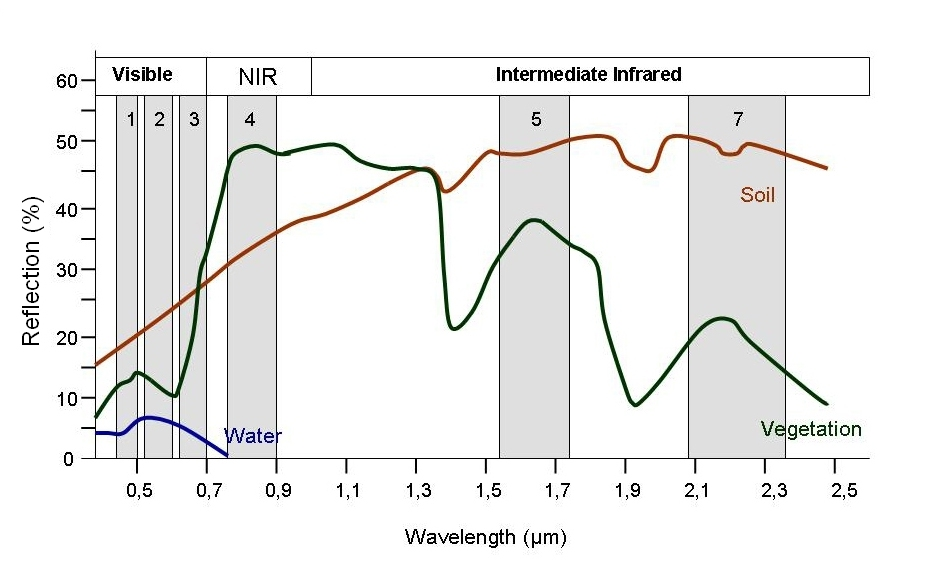

Image Credit: Science Education through Earth Observation for High Schools (SEOS). https://seos-project.eu

## Project Set-up: Imports and Earth Engine Authorization

In [1]:
!pip install geemap
!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.8 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none

In [2]:
import ee
import geemap

In [3]:
geemap.ee_initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=p0m1R0h_H2E0VqqgmXKOrRSmfmylrg3dSD1KBpr6qtc&tc=0dSVT5qvnE_ILtR5veSUltWzAugdzWmpkPGleWucrzE&cc=SlgCGpEbVUsC3_v7UEc-E7SBE8ok8XzCcsUwoyyE8lo

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VMSbKas7zyxcaqgw30dbsN3eIfd9Bqjn7p22_oici2GKnrWbHKgyUc

Successfully saved authorization token.


## Sentinel-2 Multispectral Imagery

Image Collection: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR

Sentinel-2 Bands and Combinations: https://gisgeography.com/sentinel-2-bands-combinations

In [4]:
Map = geemap.Map()

collection = (
    ee.ImageCollection('COPERNICUS/S2_SR')
    .filterDate('2021-01-01', '2022-01-01')
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 5))
)

image = collection.median()

vis = {
    'min': 0.0,
    'max': 3000,
    'bands': ['B12', 'B8A', 'B4'],
}

Map.setCenter(90.3563, 23.6850, 9.5)
Map.addLayer(image, vis, 'Sentinel-2')

Map

Map(center=[23.685, 90.3563], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chil…

## Visualize river dynamics and morphological changes with Landsat imagery timelapse

In [5]:
aoi = ee.Geometry.BBox(88.65, 23.95, 89.10, 24.25) # Padma River, Bangladesh

timelapse = geemap.landsat_timelapse(
    aoi,
    out_gif='landsat.gif',
    start_year=1984,
    end_year=2022,
    start_date='01-01',
    end_date='12-31',
    bands=['SWIR1', 'NIR', 'Red'],
    frames_per_second=4,
    title='Landsat Timelapse: Padma River, Bangladesh',
    progress_bar_color='blue',
    mp4=True,
)

geemap.show_image(timelapse)

Generating URL...
Please wait ...
The GIF image has been saved to: /content/landsat.gif


Output()

### Your turn! Draw a region of interest bounding box for any segment of a river system.

In [6]:
Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [7]:
roi = Map.user_roi
if roi is None:
    roi = ee.Geometry.BBox(-74.7222, -8.5867, -74.1596, -8.2824)
    Map.addLayer(roi)
    Map.centerObject(roi)

In [8]:
timelapse = geemap.landsat_timelapse(
    roi,
    out_gif='landsat.gif',
    start_year=1984,
    end_year=2022,
    start_date='01-01',
    end_date='12-31',
    bands=['SWIR1', 'NIR', 'Red'],
    frames_per_second=4,
    title='Landsat Timelapse',
    progress_bar_color='blue',
    mp4=True,
)
geemap.show_image(timelapse)

Generating URL...
Please wait ...
The GIF image has been saved to: /content/landsat.gif


Output()

## Extract Water Bodies by Thresholding the Normalized Difference Water Index (NDWI)

### Short-Wave Infrared Composite

This band combination uses the SWIR, NIR, and red bands. Vegetation renders as various shades of green. Generally, darker shades of green indicate denser vegetation, while brown indicates bare soil and built-up areas.

In [9]:
landsat_collection = (
    ee.ImageCollection('LANDSAT/LC08/C02/T1')
    .filterDate('2021-01-01', '2022-01-01')
)

landsat = ee.Algorithms.Landsat.simpleComposite(landsat_collection)
landsat_vis = {'bands': ['B6', 'B5', 'B4'], 'max': 128}

### Calculate NDWI and Apply Threshold Value
$$NDWI = \frac{Green - NIR}{Green + NIR}$$

where Green is the green band and NIR is the near-infrared band. The NDWI values range from -1 to 1. The NDWI values are usually thresholded to a positive number (e.g., 0.1–0.3) to identify water bodies.

In [10]:
ndwi = landsat.normalizedDifference(['B3', 'B5']).rename('NDWI')

water = ndwi.gt(0) # threshold value
water_vis = {'min': 0, 'max': 1, 'palette': ['black', 'blue']}

### Visualize the Short-Wave Infrared Composite vs. Binary Water Raster

In [11]:
data_frame = geemap.Map()
data_frame.setCenter(88.875, 24.1, 9.5) # Padma River, Bangladesh

left_panel = geemap.ee_tile_layer(landsat, landsat_vis, 'Landsat')
right_panel = geemap.ee_tile_layer(water, water_vis, 'Water')

data_frame.split_map(left_panel, right_panel, left_label='Landsat', right_label='Water')
data_frame

Map(center=[24.1, 88.875], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…